In [35]:
## Dataset information
# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# Context
# According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, 
# This is responsible for approximately 11% of total deaths.
# This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like 
# (gender, age, various diseases, and smoking status). 
# Each row in the data provides relavant information about the patient.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"E:\MLProjects\Projects\Stroke_Prediction\Stroke-data.csv")
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [37]:
print(df.describe().T)

                    count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke                 0.000      0.00    

In [38]:
# Checking the null values in the Dataframe
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [39]:
df["bmi"].fillna(df["bmi"].median(), inplace=True)
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [40]:
df = df.rename(columns={"stroke":"results"})
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
results                int64
dtype: object


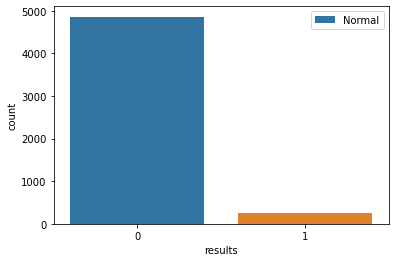

In [41]:
# Understanding the data (Normal (Healthy) - 0, Stroke - 1).

sns.countplot(x="results", data=df)
plt.legend(labels=["Normal", "Stroke"]) 


Distribution of data 
 (Number of number of Female, Male & Other 
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

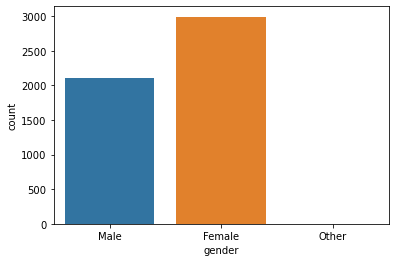

In [42]:
# Distribution of data (number of Male, Female & Other)

print("Distribution of data \n (Number of number of Female, Male & Other \n",  df["gender"].value_counts())
sns.countplot(x="gender",data=df)


<AxesSubplot:>

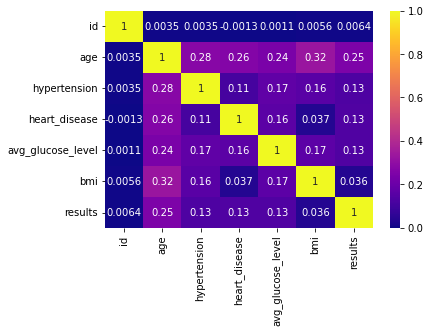

In [43]:
sns.heatmap(df.corr(), annot=True,cmap="plasma")

In [44]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [45]:
# Replacing gender columns with Male = 0, Female = 1, Other = 2

def gender(col):
    if col == "Male":
        return 0
    if col == "Female":
        return 1
    if col == "Other":
        return 2
df["gender"] = df["gender"].apply(gender)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,results
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [46]:
# Replacing gender columns with No = 0, Yes = 1

def martial(col):
    if col == "No":
        return 0
    if col == "Yes":
        return 1
df["ever_married"] = df["ever_married"].apply(martial)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,results
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
# Replacing work type columns with children = 0, Private = 1, Govt_job = 2, Self-employed = 3, Never_worked = 4

def work(col):
    if col == "children":
        return 0
    if col == "Private":
        return 1
    if col == "Govt_job":
        return 2
    if col == "Self-employed":
        return 3
    if col == "Never_worked":
        return 4
df["work_type"] = df["work_type"].apply(work)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,results
0,9046,0,67.0,0,1,1,1,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,1,3,Rural,202.21,28.1,never smoked,1
2,31112,0,80.0,0,1,1,1,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,1,1,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,1,3,Rural,174.12,24.0,never smoked,1


In [48]:
# Replacing location columns with Urban = 0, Rural = 1

def loc(col):
    if col == "Urban":
        return 0
    if col == "Rural":
        return 1    
df["Residence_type"] = df["Residence_type"].apply(loc)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,results
0,9046,0,67.0,0,1,1,1,0,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,1,3,1,202.21,28.1,never smoked,1
2,31112,0,80.0,0,1,1,1,1,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,1,1,0,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,1,3,1,174.12,24.0,never smoked,1


In [49]:
# Replacing smoking status columns with Never smoked = 0, Formerly smoked = 1, Smokes = 2, Unknown = 3

def smoking_status(col):
    if col == "smokes":
        return 1
    if col == "never smoked":
        return 0
    if col == "formerly smoked":
        return 2
    if col == "Unknown":
        return 3
df["smoking_status"] = df["smoking_status"].apply(smoking_status)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,results
0,9046,0,67.0,0,1,1,1,0,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,3,1,202.21,28.1,0,1
2,31112,0,80.0,0,1,1,1,1,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,1,0,171.23,34.4,1,1
4,1665,1,79.0,1,0,1,3,1,174.12,24.0,0,1


In [50]:
# Defining and Normalizing values of X.

X = df.drop(labels=['results', 'id'], axis=1)
print(X.describe().T)   # Normalizing

                    count        mean        std    min     25%     50%  \
gender             5110.0    0.586301   0.492941   0.00   0.000   1.000   
age                5110.0   43.226614  22.612647   0.08  25.000  45.000   
hypertension       5110.0    0.097456   0.296607   0.00   0.000   0.000   
heart_disease      5110.0    0.054012   0.226063   0.00   0.000   0.000   
ever_married       5110.0    0.656164   0.475034   0.00   0.000   1.000   
work_type          5110.0    1.327593   0.914168   0.00   1.000   1.000   
Residence_type     5110.0    0.491977   0.499985   0.00   0.000   0.000   
avg_glucose_level  5110.0  106.147677  45.283560  55.12  77.245  91.885   
bmi                5110.0   28.862035   7.699562  10.30  23.800  28.100   
smoking_status     5110.0    1.407241   1.259571   0.00   0.000   1.000   

                      75%     max  
gender               1.00    2.00  
age                 61.00   82.00  
hypertension         0.00    1.00  
heart_disease        0.00    1

In [51]:
# Normalizing the values to bring them to similar range.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform (X)
print (X)       # Normalized values

[[0.         0.81689453 0.         ... 0.80126489 0.30126002 0.66666667]
 [0.5        0.74365234 0.         ... 0.67902317 0.20389462 0.        ]
 [0.         0.97558594 0.         ... 0.23451205 0.25429553 0.        ]
 ...
 [0.5        0.42626953 0.         ... 0.12865848 0.2325315  0.        ]
 [0.         0.62158203 0.         ... 0.51320284 0.17525773 0.66666667]
 [0.5        0.53613281 0.         ... 0.13922999 0.18213058 1.        ]]


In [52]:
Y = df["results"]

In [53]:
# Splitting the data to train and test.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size=0.2, random_state=42)
print(f"Shape of the training data is {X_train.shape}")
print(f"Shape of the testing data is {X_test.shape}")

Shape of the training data is (4088, 10)
Shape of the testing data is (1022, 10)


In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [55]:
# Defining the model.

model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['Accuracy']) 
print(model.summary())  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                352       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4645 - Accuracy: 0.9012 - val_loss: 0.3355 - val_Accuracy: 0.9393
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 0.2618 - Accuracy: 0.9543 - val_loss: 0.2615 - val_Accuracy: 0.9393
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 0.2176 - Accuracy: 0.9543 - val_loss: 0.2503 - val_Accuracy: 0.9393
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 0.2046 - Accuracy: 0.9543 - val_loss: 0.2424 - val_Accuracy: 0.9393
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1983 - Accuracy: 0.9543 - val_loss: 0.2353 - val_Accuracy: 0.9393
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1941 - Accuracy: 0.9543 - val_loss: 0.2295 - val_Accuracy: 0.9393
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1921 - Accuracy: 0.9543 - val_loss: 0.2239 - val_Accuracy: 0.9393
Epoch 8/100
6

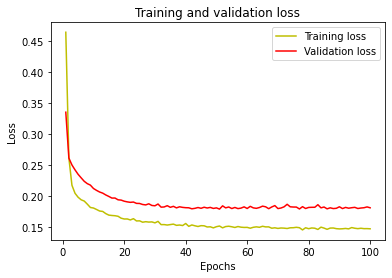

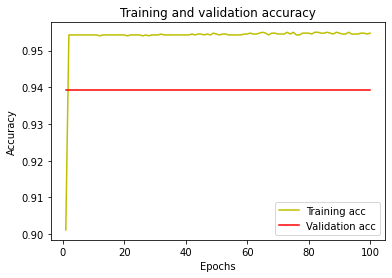

In [57]:
# Plotting the training and validation loss at each epoch.

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy each epoch.

acc = history.history['Accuracy']  
val_acc = history.history['val_Accuracy']  
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot:>

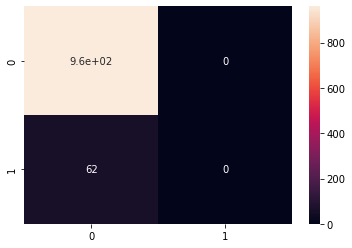

In [58]:
# Predicting the Test results.

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


# Confusion Matrix.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)

print ("Accuracy of the model is: ", round(accuracy_score,3)*100)

Accuracy of the model is:  93.89999999999999
